In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [3]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="EMEA") & (data.business_area_name=="A00 - Equipment")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
54,A00 - Equipment,EMEA,2017-01-01,-39904.71
88,A00 - Equipment,EMEA,2017-02-01,22296.18
116,A00 - Equipment,EMEA,2017-03-01,1818318.38
119,A00 - Equipment,EMEA,2017-04-01,967461.28
158,A00 - Equipment,EMEA,2017-05-01,2210286.85


,date,sales
0,2017-01-01,-39904.71
1,2017-02-01,22296.18
2,2017-03-01,1818318.38
3,2017-04-01,967461.28
4,2017-05-01,2210286.85


In [6]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

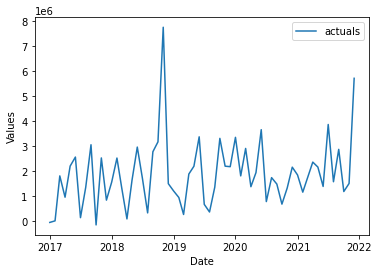

In [7]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

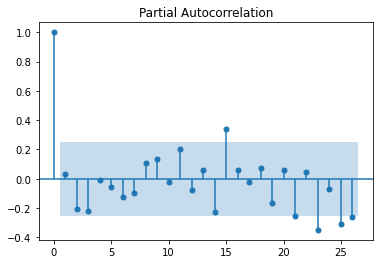

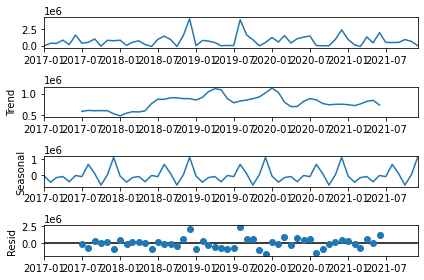

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [8]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
1/1 [==============================] - 47s 47s/step - loss: 0.2817 - val_loss: 0.2572
Epoch 2/200
1/1 [==============================] - 0s 306ms/step - loss: 0.2715 - val_loss: 0.2389
Epoch 3/200
1/1 [==============================] - 0s 295ms/step - loss: 0.2532 - val_loss: 0.2063
Epoch 4/200
1/1 [==============================] - 0s 310ms/step - loss: 0.2191 - val_loss: 0.1544
Epoch 5/200
1/1 [==============================] - 0s 280ms/step - loss: 0.1655 - val_loss: 0.1760
Epoch 6/200
1/1 [==============================] - 0s 289ms/step - loss: 0.1637 - val_loss: 0.1471
Epoch 7/200
1/1 [==============================] - 0s 282ms/step - loss: 0.1318 - val_loss: 0.1239
Epoch 8/200
1/1 [==============================] - 0s 272ms/step - loss: 0.1096 - val_loss: 0.1376
Epoch 9/200
1/1 [==============================] - 0s 295ms/step - loss: 0.1114 - val_loss: 0.1458
Epoch 10/200
1/1 [==============================] - 0s 273ms/step - loss: 0.1121 - val_loss: 0.1489
Epoch 11/2

1/1 [==============================] - 0s 246ms/step - loss: 0.0917 - val_loss: 0.1245
Epoch 84/200
1/1 [==============================] - 0s 230ms/step - loss: 0.0919 - val_loss: 0.1260
Epoch 85/200
1/1 [==============================] - 0s 236ms/step - loss: 0.0919 - val_loss: 0.1275
Epoch 86/200
1/1 [==============================] - 0s 242ms/step - loss: 0.0921 - val_loss: 0.1282
Epoch 87/200
1/1 [==============================] - 0s 231ms/step - loss: 0.0920 - val_loss: 0.1280
Epoch 88/200
1/1 [==============================] - 0s 233ms/step - loss: 0.0915 - val_loss: 0.1270
Epoch 89/200
1/1 [==============================] - 0s 237ms/step - loss: 0.0915 - val_loss: 0.1262
Epoch 90/200
1/1 [==============================] - 0s 234ms/step - loss: 0.0918 - val_loss: 0.1258
Epoch 91/200
1/1 [==============================] - 0s 228ms/step - loss: 0.0919 - val_loss: 0.1256
Epoch 92/200
1/1 [==============================] - 0s 225ms/step - loss: 0.0920 - val_loss: 0.1252
Epoch 93/200


1/1 [==============================] - 0s 256ms/step - loss: 0.0916 - val_loss: 0.1249
Epoch 165/200
1/1 [==============================] - 0s 261ms/step - loss: 0.0918 - val_loss: 0.1250
Epoch 166/200
1/1 [==============================] - 0s 265ms/step - loss: 0.0918 - val_loss: 0.1263
Epoch 167/200
1/1 [==============================] - 0s 278ms/step - loss: 0.0916 - val_loss: 0.1278
Epoch 168/200
1/1 [==============================] - 0s 275ms/step - loss: 0.0918 - val_loss: 0.1282
Epoch 169/200
1/1 [==============================] - 0s 257ms/step - loss: 0.0919 - val_loss: 0.1276
Epoch 170/200
1/1 [==============================] - 0s 225ms/step - loss: 0.0918 - val_loss: 0.1258
Epoch 171/200
1/1 [==============================] - 0s 224ms/step - loss: 0.0918 - val_loss: 0.1239
Epoch 172/200
1/1 [==============================] - 0s 224ms/step - loss: 0.0917 - val_loss: 0.1229
Epoch 173/200
1/1 [==============================] - 0s 250ms/step - loss: 0.0917 - val_loss: 0.1231
Epoc

Epoch 46/200
2/2 [==============================] - 0s 266ms/step - loss: 0.0833 - val_loss: 0.1128
Epoch 47/200
2/2 [==============================] - 1s 274ms/step - loss: 0.0833 - val_loss: 0.1131
Epoch 48/200
2/2 [==============================] - 0s 253ms/step - loss: 0.0834 - val_loss: 0.1127
Epoch 49/200
2/2 [==============================] - 0s 215ms/step - loss: 0.0830 - val_loss: 0.1124
Epoch 50/200
2/2 [==============================] - 0s 245ms/step - loss: 0.0829 - val_loss: 0.1128
Epoch 51/200
2/2 [==============================] - 1s 267ms/step - loss: 0.0831 - val_loss: 0.1158
Epoch 52/200
2/2 [==============================] - 0s 235ms/step - loss: 0.0833 - val_loss: 0.1175
Epoch 53/200
2/2 [==============================] - 0s 267ms/step - loss: 0.0839 - val_loss: 0.1181
Epoch 54/200
2/2 [==============================] - 0s 223ms/step - loss: 0.0834 - val_loss: 0.1186
Epoch 55/200
2/2 [==============================] - 0s 258ms/step - loss: 0.0830 - val_loss: 0.1196


2/2 [==============================] - 0s 260ms/step - loss: 0.0830 - val_loss: 0.1094
Epoch 128/200
2/2 [==============================] - 1s 293ms/step - loss: 0.0829 - val_loss: 0.1101
Epoch 129/200
2/2 [==============================] - 0s 265ms/step - loss: 0.0828 - val_loss: 0.1141
Epoch 130/200
2/2 [==============================] - 0s 259ms/step - loss: 0.0827 - val_loss: 0.1158
Epoch 131/200
2/2 [==============================] - 0s 255ms/step - loss: 0.0826 - val_loss: 0.1143
Epoch 132/200
2/2 [==============================] - 0s 250ms/step - loss: 0.0828 - val_loss: 0.1148
Epoch 133/200
2/2 [==============================] - 0s 258ms/step - loss: 0.0827 - val_loss: 0.1173
Epoch 134/200
2/2 [==============================] - 0s 250ms/step - loss: 0.0831 - val_loss: 0.1185
Epoch 135/200
2/2 [==============================] - 0s 257ms/step - loss: 0.0838 - val_loss: 0.1178
Epoch 136/200
2/2 [==============================] - 0s 261ms/step - loss: 0.0839 - val_loss: 0.1167
Epoc

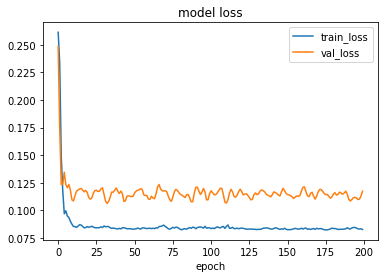

In [9]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

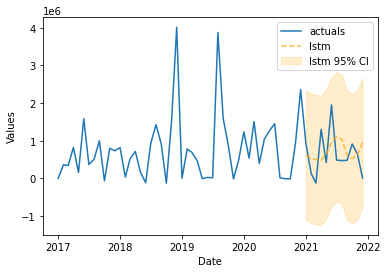

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

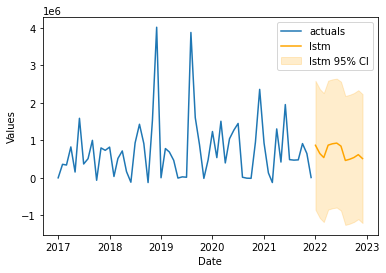

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,15.56,585194.33,-0.11,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,2335017.67,614345.33,927008.86,-1106327.00,lstm,0.95
1,2021-02-01,2251977.86,531305.52,128317.02,-1189366.82,lstm,0.95
2,2021-03-01,2218159.13,497486.80,-128072.05,-1223185.54,lstm,0.95
3,2021-04-01,2200606.50,479934.16,1303145.72,-1240738.17,lstm,0.95
4,2021-05-01,2356903.78,636231.44,418468.22,-1084440.89,lstm,0.95
5,2021-06-01,2687269.46,966597.12,1953122.88,-754075.21,lstm,0.95
6,2021-07-01,2821871.37,1101199.03,483272.71,-619473.30,lstm,0.95
7,2021-08-01,2754689.79,1034017.45,469569.45,-686654.88,lstm,0.95
8,2021-09-01,2334620.56,613948.23,476751.55,-1106724.11,lstm,0.95
9,2021-10-01,2248761.26,528088.92,911368.65,-1192583.42,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,2587116.26,866443.93,-854228.41,lstm,0.95
1,2022-02-01,2366379.60,645707.26,-1074965.08,lstm,0.95
2,2022-03-01,2258499.67,537827.33,-1182845.01,lstm,0.95
3,2022-04-01,2590754.26,870081.92,-850590.42,lstm,0.95
4,2022-05-01,2626804.32,906131.98,-814540.35,lstm,0.95
5,2022-06-01,2645161.55,924489.22,-796183.12,lstm,0.95
6,2022-07-01,2564550.30,843877.97,-876794.37,lstm,0.95
7,2022-08-01,2181422.80,460750.46,-1259921.88,lstm,0.95
8,2022-09-01,2214025.35,493353.02,-1227319.32,lstm,0.95
9,2022-10-01,2260501.83,539829.50,-1180842.84,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:7594394.743867001
Total_2022:8215893.091898568
YOY (growth):8.183645556921707
